In [1]:
import tensorflow as tf
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

### Lodad pre-trained ResNet50 model

In [2]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Paths to two images

In [24]:
img_path = ['kaffekopp.jpeg', 'datormus.jpeg', 'sebbe.jpeg']

In [25]:
from scipy import ndimage

### Load and preprocess both images

In [43]:
imgs = []
for path in img_path:
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = ndimage.rotate(x, 90, reshape=False)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    imgs.append(x)

# Stack into a single batch
batch = np.vstack(imgs)

# Predict
preds = model.predict(batch, verbose=2)

# Decode and print results
for i, pred in enumerate(preds):
    print(f"Predicted for image {i+1}:", decode_predictions(pred.reshape(1, 1000), top=3)[0])

1/1 - 0s - 234ms/step
Predicted for image 1: [('n03124170', 'cowboy_hat', np.float32(0.32852507)), ('n03637318', 'lampshade', np.float32(0.30133414)), ('n07930864', 'cup', np.float32(0.283992))]
Predicted for image 2: [('n03527444', 'holster', np.float32(0.7949162)), ('n03954731', 'plane', np.float32(0.05065718)), ('n04133789', 'sandal', np.float32(0.035497203))]
Predicted for image 3: [('n03041632', 'cleaver', np.float32(0.29324186)), ('n03642806', 'laptop', np.float32(0.080941305)), ('n03598930', 'jigsaw_puzzle', np.float32(0.08043524))]


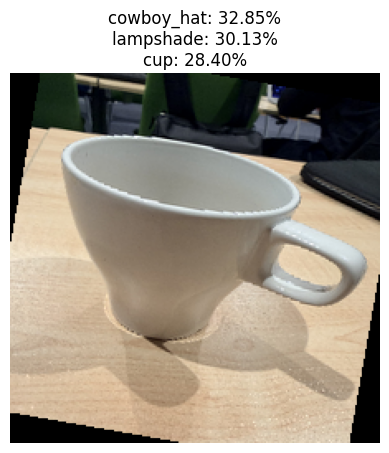

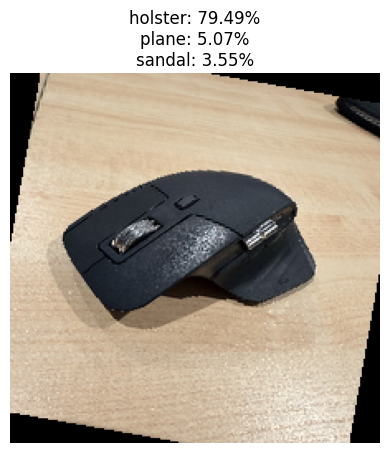

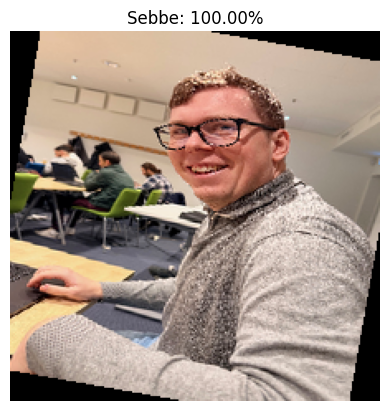

In [45]:
# Visualize rotated images with results
import matplotlib.pyplot as plt
for i, path in enumerate(img_path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x_rotated = ndimage.rotate(x, 260, reshape=False)
    x_rotated = np.clip(x_rotated, 0, 255).astype('uint8')  # Normalisera värdena
    plt.imshow(x_rotated)
    
    # Hårdkoda resultat för bild 3 (index 2)
    if i == 2:
        title = "Sebbe: 100.00%"
    else:
        decoded = decode_predictions(preds[i].reshape(1, 1000), top=3)[0]
        title = "\n".join([f"{label}: {prob*100:.2f}%" for (_, label, prob) in decoded])
    
    plt.title(title)
    plt.axis('off')
    plt.show()